# Vorhersage von Hauspreisen mit Regressionsmethoden

In dieser Übung werden Sie den bekannten *Ames Housing Datensatz* von Dean De Cock analysieren. Dieser enthält 79 erklärende Variablen, um den Preis eines Hauses vorherzusagen.

## 1. Laden von benötigten Paketen und des Datensatzes
Laden Sie bitte die Pakete **Pandas** als **pd** und **Seaborn** als **sns** mit dem **import** Befehl. Fügen Sie außerdem die Zeile *%matplotlib inline* hinzu, damit Plots direkt in Seaborn ohne den Befehl *plt.show()* angezeigt werden.
Anschließend lesen Sie bitte die CSV File **houses.csv** als DataFrame mit dem Namen houses.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
houses = pd.read_csv('houses.csv')

Nutzen Sie bitte die .head(), .info() und .describe() Methode, um sich einen ersten Überblick über den Datensatz zu verschaffen.

In [5]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Versuchen Sie bitte mit dem generetierten Output folgende Fragen zu beantworten:
- Wieviele Einträge hat der Datensatz?
- Wieviele Spalten gibt es?
- Wieviele numerische und nicht-numerische Spalten gibt es?
- Welches Feature hat die meisten Null Values?

## 2. Data Exploration
In diesem Abschnitt geht es darum, den Datensatz besser zu verstehen. Hierfür werden wir verschiedene Plots generieren. 

Zunächst möchten wir ein Histogram erstellen, um uns die Verteilung unserer TargetVariable **SalePrice** anzuschauen. Verwenden Sie hierfür die Seaborn-Methode distplot(). Setzen Sie außerdem *kde* auf False und ändern Sie die Anzahl der verwendeten *bins* auf 30.

Tipp: Falls Sie die Argumente für die Methode vergessen haben, nutzen Sie die *Shift+Tab* Tastenkombination innerhalb der Klammern, um sich eine Beschreibung anzeigen zu lassen.

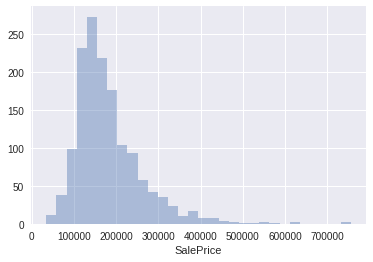

In [20]:
sns.distplot(houses['SalePrice'], bins=30, kde=False)

Bitte beschreiben Sie, was Sie sehen und Ihnen auffällt:

Die Verteilung hat ein Maximum bei ca. 150.000 $. Bis zum Maximum is der Anstieg recht steil, nach dem Maximum, insbesondere im "Tail-Bereich" der Verteilung ist der Abfall flacher im vgl. Dies bedeutet, dass die Verteilung leicht schief ist. Dies können wir beispielsweise mit dem Befehl .skew() auch quantitativ bestätigen. Ein positiver Wert bedeutet, dass der Tail auf der rechten seite länger/flacher ist als auf der linken Seite. Falls die Verteilung symmetrisch wäre, dann wäre der Mean=Median. Andernfalls lässt sich keine einfache Aussage treffen. Da wir aber außerdem viele Ausreißer zur rechten Seite sehen, ist der Median sehr wahrscheinlich kleiner als der Mean.

In [18]:
houses.SalePrice.skew()

1.8828757597682129

Sie haben vermutlich festgestellt, dass es viele Ausreißer zur rechten Seite gibt. Wieviele sind es? Als Ausreißer definieren wir die Beobachtungen, für die gilt:

$$ SalePrice > mean + 3 \times std $$
und
$$ SalePrice < mean - 3 \times std $$

In [33]:
std = houses.SalePrice.std()
mean = houses.SalePrice.mean()

housesOutliersRight = houses[(abs(houses['SalePrice']) > (mean + 3 * std))]
housesOutliersLeft = houses[(abs(houses['SalePrice']) < (mean - 3 * std))]

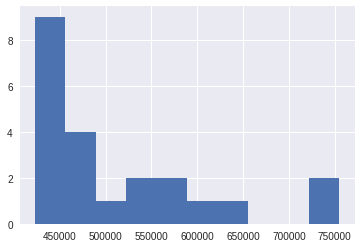

In [38]:
housesOutliersRight.SalePrice.hist()

Nun wollen wir uns die Korrelationen zwischen den erklärenden Variablen und natürlich auf der Target Variables anschauen. Hierfür berechnen wir zunächst die Korrelationsmatrix der numerischen Variablen mit der Methode .corr(). 
Anschließend wollen wir diese Matrix in Form einer Heatmap plotten.

In [42]:
# Es werden automatisch nur die numerischen Features verwendet
corr = houses.corr()

In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


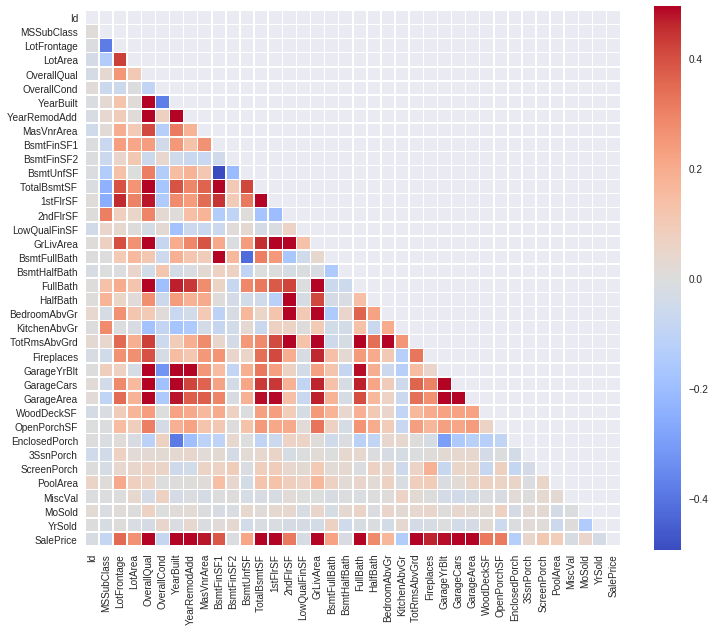

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=0.5, vmax=.3, square=True)

Im nächsten Schritt hätten wir gerne eine Liste der am stärksten korrelierten und antikorrelierten Größen.

In [53]:
# Ergänzen und erklären
cond = np.triu(np.ones(corr.shape), k=1).astype(np.bool)
os = corr.where(cond).stack().sort_values(ascending=False)
# multilvl index
os[:,'SalePrice'].head(5)

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
dtype: float64

In [54]:
os[:,'SalePrice'].tail(5)

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

Denken Sie daran, dass eine monetäre Korrelation von ungefähr 0 Ihnen nicht sagen kann, ob das Feature und das Target voneinander unabhängig sind. Stellen Sie sich beispielsweise eine quadratische AbHängigkeit wie beispielsweise $y = (x-x_0)^2$ vor. Solange $x < x_0$ ist sinkt y mit x, sobald $x > x_0$ steigt y mit x. Die Beiträge in der Korrelationsformel können sich somit ausgleichen.

Pearson Corr Koeff: $$ r_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_x s_y}$$

Dieser oben erwähnte Sachverhalt lässt sich auch recht anschaulich im folgenden Diagramm erkennen. (english Wiki correlation)